In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tcr
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [246]:
#read in data
credit_data = pd.read_csv('/home/amybirdee/hobby_projects/credit_card_customer_clustering/Customer_data.csv')

In [247]:
#view data
credit_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [248]:
#data dictionary
#CUSTID : Identification of Credit Card holder (Categorical)
#BALANCE : Balance amount left in their account to make purchases
#BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
#PURCHASES : Amount of purchases made from account
#ONEOFFPURCHASES : Maximum purchase amount done in one-go
#INSTALLMENTSPURCHASES : Amount of purchase done in installment
#CASHADVANCE : Cash in advance given by the user
#PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
#ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
#PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
#CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
#CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
#PURCHASESTRX : Numbe of purchase transactions made
#CREDITLIMIT : Limit of Credit Card for user
#PAYMENTS : Amount of Payment done by user
#MINIMUM_PAYMENTS : Minimum amount of payments made by user
#PRCFULLPAYMENT : Percent of full payment paid by user
#TENURE : Tenure of credit card service for user

In [249]:
#check number of rows and columns
credit_data.shape

(8950, 18)

In [250]:
#check info for dataframe - everything is a float or integer apart from customer id
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [251]:
#check for null values - credit limit and minimum payments have null values
credit_data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [252]:
#filling null values with the median value
credit_data['CREDIT_LIMIT'] = credit_data.CREDIT_LIMIT.fillna(credit_data['CREDIT_LIMIT'].median())
credit_data['MINIMUM_PAYMENTS'] = credit_data.MINIMUM_PAYMENTS.fillna(credit_data['MINIMUM_PAYMENTS'].median())

In [253]:
#check for nulls again
credit_data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [254]:
#rounding all columns to make them neater
credit_data = np.round(credit_data, 2)
credit_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.51,0.00,12
1,C10002,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.34,0.22,12
2,C10003,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,627.28,0.00,12
3,C10004,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,312.34,0.00,12
4,C10005,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.79,0.00,12


In [255]:
#checking stats for dataframe
credit_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474826,0.877426,1003.204834,592.437371,411.067645,978.871102,0.490217,0.202177,0.364553,0.134911,3.248827,14.709832,4494.282473,1733.143878,844.906653,0.153534,11.517318
std,2081.531851,0.237169,2136.634782,1659.887917,904.338115,2097.163869,0.401678,0.298555,0.397623,0.200262,6.824647,24.857649,3638.646702,2895.063787,2332.792352,0.292648,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.020000,0.000000,6.000000
25%,128.280000,0.890000,39.635000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.272500,170.857500,0.000000,12.000000
50%,873.385000,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.080000,0.170000,0.000000,0.000000,7.000000,3000.000000,856.900000,312.340000,0.000000,12.000000
75%,2054.137500,1.000000,1110.130000,577.405000,468.637500,1113.822500,0.920000,0.300000,0.750000,0.220000,4.000000,17.000000,6500.000000,1901.135000,788.712500,0.140000,12.000000
max,19043.140000,1.000000,49039.570000,40761.250000,22500.000000,47137.210000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.480000,76406.210000,1.000000,12.000000


In [256]:
#creating new dataframe for first set of charts which will show distribution of balance and credit limit
chart_1 = credit_data[['BALANCE', 'CREDIT_LIMIT']]
chart_1.head()

,BALANCE,CREDIT_LIMIT
0,40.90,1000.0
1,3202.47,7000.0
2,2495.15,7500.0
3,1666.67,7500.0
4,817.71,1200.0


In [257]:
#Change column titles to remove underscore and make it title case for chart labelling
chart_1 = chart_1.rename(columns = {'BALANCE': 'Balance', 'CREDIT_LIMIT': 'Credit Limit'})

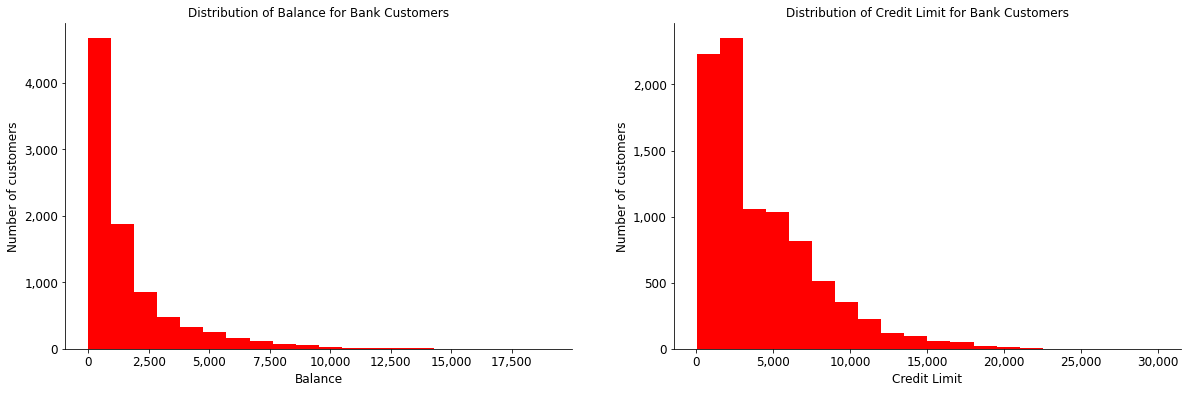

In [258]:
#creating histograms showing distrubution of balance and credit limit - both charts have a right skew and so most customers 
#have a balance and credit limit which is on the lower side and very few people have very high balances and credit limits

#function to add comma separator to labels. Functions takes tick label and tick position
def comma(x, pos):
    return format(x, ",.0f")

fig = plt.figure(figsize = (20, 6))

#looping through dataframe columns to create two subplots
#using enumerate will assign an index to each row in the dataframe and iterate over it
for i, col, in enumerate(chart_1, start = 1):
    ax = plt.subplot(1, 2, i)
    #creating a histogram
    chart_1[col].hist(bins = 20, color = 'red')
    #removing top and right chart borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #applying the above function so that axis values are separated by a comma 
    ax.xaxis.set_major_formatter(tcr.FuncFormatter(comma))
    ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Number of customers', fontsize = 12)
    plt.tick_params(axis = 'x', labelsize = 12)
    plt.tick_params(axis = 'y', labelsize = 12)
    plt.grid(None)
    plt.title('Distribution of ' + col + ' for Bank Customers', fontsize = 12)

plt.savefig('balance_and_credit_limit')

In [259]:
#creating new dataframe for second set of charts which will show distribution of purchases
chart_2 = credit_data[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']]
chart_2.head()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE
0,95.40,0.00,95.4,0.00
1,0.00,0.00,0.0,6442.95
2,773.17,773.17,0.0,0.00
3,1499.00,1499.00,0.0,205.79
4,16.00,16.00,0.0,0.00


In [260]:
#changing column titles for chart
chart_2 = chart_2.rename(columns = {'PURCHASES': 'Purchases', 'ONEOFF_PURCHASES': 'One-off Purchases', 'INSTALLMENTS_PURCHASES':\
                                   'Installment Purchases', 'CASH_ADVANCE': 'Cash Advance'})

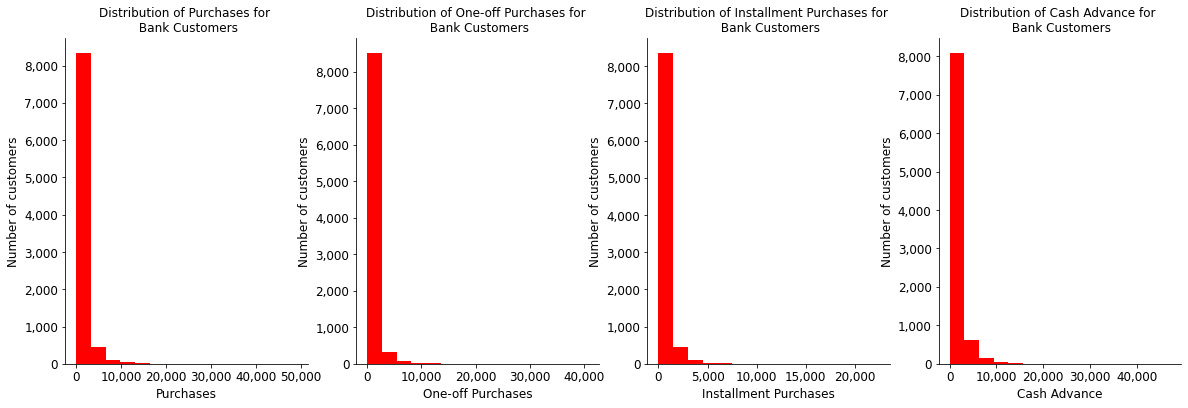

In [261]:
#creating histograms showing distrubution of purchases - again there is a right skew with most customers purchasing goods
#within a £5,000 limit

#function to add comma separator to labels. Functions takes tick label and tick position
def comma(x, pos):
    return format(x, ",.0f")

fig = plt.figure(figsize = (20, 6))

#looping through dataframe columns to create two subplots
#using enumerate will assign an index to each row in the dataframe and iterate over it
for i, col, in enumerate(chart_2, start = 1):
    ax = plt.subplot(1, 4, i)
    #creating a histogram
    chart_2[col].hist(bins = 15, color = 'red')
    #removing top and right chart borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #applying the above function so that axis values are separated by a comma 
    ax.xaxis.set_major_formatter(tcr.FuncFormatter(comma))
    ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Number of customers', fontsize = 12)
    plt.tick_params(axis = 'x', labelsize = 12)
    plt.tick_params(axis = 'y', labelsize = 12)
    plt.grid(None)
    plt.title('Distribution of ' + col + ' for \n Bank Customers', fontsize = 12)

plt.savefig('purchases')

In [262]:
#some customers have purchases of over £20,000 - seeing who these customers are - only 21 customers
big_spenders = credit_data[credit_data.PURCHASES >= 20000].reset_index(drop = True)
big_spenders

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10144,19043.14,1.00,22009.92,9449.07,12560.85,0.00,1.00,0.75,1.00,0.00,0,216,18000.0,23018.58,18621.01,0.00,12
1,C10284,5131.32,1.00,32539.78,26547.43,5992.35,0.00,1.00,1.00,1.00,0.00,0,98,11500.0,26652.34,1971.13,0.08,12
2,C10523,13479.29,1.00,41050.40,40624.06,426.34,0.00,0.83,0.67,0.42,0.00,0,157,17000.0,36066.75,15914.48,0.08,12
3,C10529,2643.34,1.00,26402.39,22257.39,4145.00,0.00,1.00,1.00,0.33,0.00,0,114,16500.0,24529.28,534.03,1.00,12
4,C10574,11547.52,1.00,49039.57,40761.25,8278.32,558.17,1.00,1.00,0.92,0.08,1,101,22500.0,46930.60,2974.07,0.25,12
5,C10611,2492.73,1.00,27957.68,23032.97,4924.71,0.00,1.00,1.00,0.92,0.00,0,70,9000.0,27255.01,537.37,1.00,12
6,C11004,3108.39,0.90,26582.34,15158.90,11423.44,0.00,0.90,0.80,0.80,0.00,0,55,28000.0,26557.10,586.03,0.88,10
7,C11234,1893.61,1.00,22746.81,15795.42,6951.39,0.00,1.00,1.00,1.00,0.00,0,140,18000.0,22558.28,505.13,1.00,12
8,C11300,4010.62,1.00,40040.71,24543.52,15497.19,0.00,1.00,1.00,1.00,0.00,0,358,18000.0,33994.73,703.50,1.00,12
9,C11495,8151.99,1.00,25615.07,25122.77,492.30,0.00,1.00,1.00,0.58,0.00,0,56,17000.0,17575.20,2465.47,0.17,12


In [263]:
#creating new dataframe for third set of charts which will show distribution of payments and tenure
chart_3 = credit_data[['PAYMENTS', 'MINIMUM_PAYMENTS']]
chart_3.head()

,PAYMENTS,MINIMUM_PAYMENTS
0,201.80,139.51
1,4103.03,1072.34
2,622.07,627.28
3,0.00,312.34
4,678.33,244.79


In [264]:
#changing columns names for charts
chart_3 = chart_3.rename(columns = {'PAYMENTS': 'Payments', 'MINIMUM_PAYMENTS': 'Minimum Payments'})

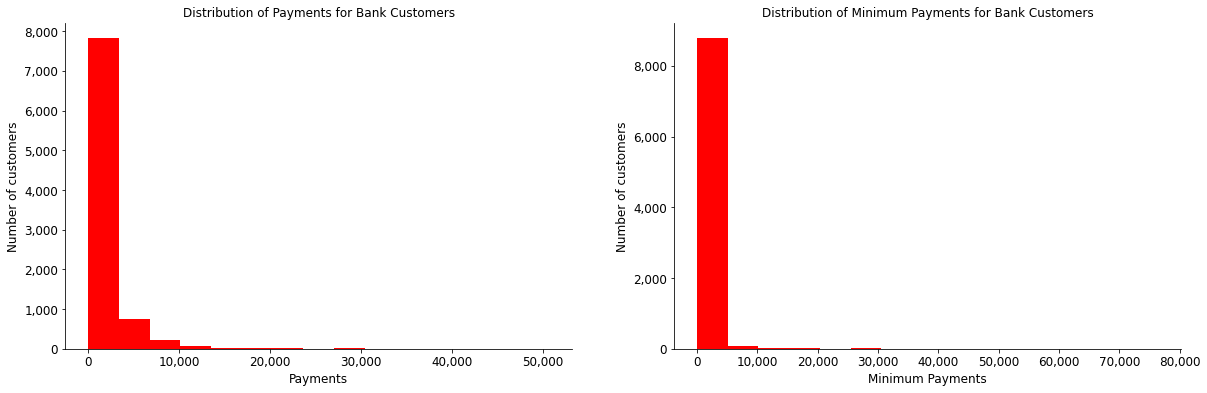

In [265]:
#creating histograms showing distrubution of payments - right skew again - most customers pay back smaller amounts and 
#there are a few customers who repay huge sums - probably those who borrow huge sums

#function to add comma separator to labels. Functions takes tick label and tick position
def comma(x, pos):
    return format(x, ",.0f")

fig = plt.figure(figsize = (20, 6))

#looping through dataframe columns to create two subplots
#using enumerate will assign an index to each row in the dataframe and iterate over it
for i, col, in enumerate(chart_3, start = 1):
    ax = plt.subplot(1, 2, i)
    #creating a histogram
    chart_3[col].hist(bins = 15, color = 'red')
    #removing top and right chart borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #applying the above function so that axis values are separated by a comma 
    ax.xaxis.set_major_formatter(tcr.FuncFormatter(comma))
    ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Number of customers', fontsize = 12)
    plt.tick_params(axis = 'x', labelsize = 12)
    plt.tick_params(axis = 'y', labelsize = 12)
    plt.grid(None)
    plt.title('Distribution of ' + col + ' for Bank Customers', fontsize = 12)

plt.savefig('payments')

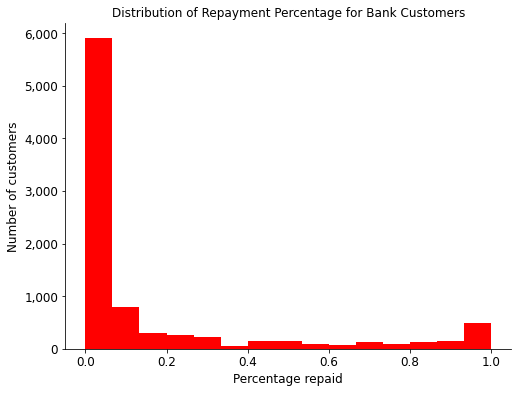

In [266]:
#creating chart to show distribution of repayment percentages - majority of customers have repaid around 5% of their balance
fig = plt.figure(figsize = (8, 6))
ax = plt.subplot()

credit_data['PRC_FULL_PAYMENT'].hist(bins = 15, color = 'red')
#removing top and right chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#applying the above function so that axis values are separated by a comma - for the y axis only
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))
    
plt.xlabel('Percentage repaid', fontsize = 12)
plt.ylabel('Number of customers', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.grid(None)
plt.title('Distribution of Repayment Percentage for Bank Customers', fontsize = 12)
plt.savefig('repayment_percentage')

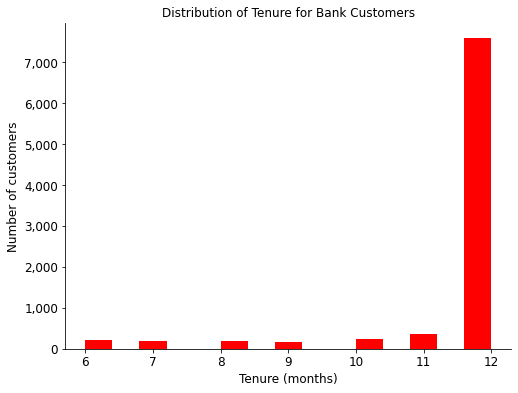

In [267]:
#creating chart to show distribution of tenure - majority of customers have a tenure of 12 months
fig = plt.figure(figsize = (8, 6))
ax = plt.subplot()

credit_data['TENURE'].hist(bins = 15, color = 'red')
#removing top and right chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#applying the above function so that axis values are separated by a comma - for the y axis only
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))
    
plt.xlabel('Tenure (months)', fontsize = 12)
plt.ylabel('Number of customers', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.grid(None)
plt.title('Distribution of Tenure for Bank Customers', fontsize = 12)
plt.savefig('tenure')

In [268]:
#customer id won't b used in the KMeans model so putting that in a separate variable
cust_id = credit_data[['CUST_ID']]
cust_id.head()

,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005


In [269]:
#dropping customer id from main dataframe to use in model
credit_data = credit_data.drop(['CUST_ID'], axis = 1)
credit_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.51,0.00,12
1,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.34,0.22,12
2,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,627.28,0.00,12
3,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,312.34,0.00,12
4,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.79,0.00,12


In [270]:
#defining the scaler
scaler = MinMaxScaler()

In [271]:
#saving the column values to a new variable to reassign after scaling
credit_data_columns = credit_data.columns

In [272]:
#scaling the data to be used in the model
credit_data_scaled = pd.DataFrame(scaler.fit_transform(credit_data))

#reassigning the column names
credit_data_scaled.columns = credit_data_columns

In [273]:
credit_data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.82,0.001945,0.000000,0.00424,0.000000,0.17,0.00,0.08,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.00,1.0
1,0.168169,0.91,0.000000,0.000000,0.00000,0.136685,0.00,0.00,0.00,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.22,1.0
2,0.131026,1.00,0.015766,0.018968,0.00000,0.000000,1.00,1.00,0.00,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.00,1.0
3,0.087521,0.64,0.030567,0.036775,0.00000,0.004366,0.08,0.08,0.00,0.053333,0.00813,0.002793,0.248748,0.000000,0.004088,0.00,1.0
4,0.042940,1.00,0.000326,0.000393,0.00000,0.000000,0.08,0.08,0.00,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.00,1.0


In [274]:
#implementing the model. First defining a range for k
K = range(1, 10)

#an empty list containing the sum of square errors - this is what will be used to plot the elbow curve to decide the number
#of clusters
sum_squared_error = []

for k in K:
    kmeans_model = KMeans(n_clusters = k, random_state = 42)
    kmeans_model.fit(credit_data_scaled)
    #inertia is the sum of squared error for each cluster. The smaller the inertia the denser the cluster (the closer together
    #all the points are)
    sum_squared_error.append(kmeans_model.inertia_)

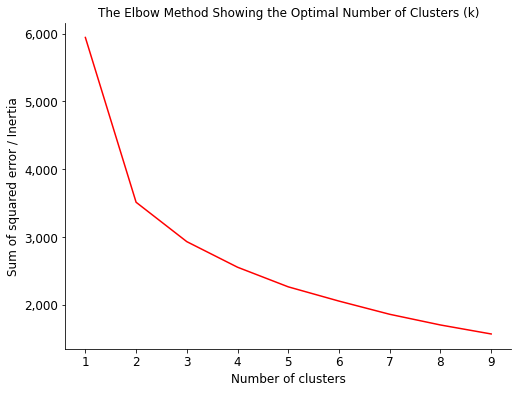

In [294]:
#plot the elbow curve - this suggests there should be three clusters
fig = plt.figure(figsize = (8, 6))
ax = plt.subplot()

plt.plot(K, sum_squared_error, color = 'red')

#removing top and right chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#applying the above function so that axis values are separated by a comma - for the y axis only
ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))
    
plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('Sum of squared error / Inertia', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.grid(False)
plt.title('The Elbow Method Showing the Optimal Number of Clusters (k)', fontsize = 12)
plt.savefig('elbow_curve')

In [276]:
#choosing 3 clusters and predicting the cluster of each customer
cluster = KMeans(n_clusters = 3, random_state = 42)

#adding a new column to the dataframe which will be the cluster prediction
credit_data_scaled['Cluster'] = cluster.fit_predict(credit_data_scaled)
cluster.labels_

array([1, 1, 2, ..., 0, 1, 2], dtype=int32)

In [277]:
credit_data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0.002148,0.82,0.001945,0.000000,0.00424,0.000000,0.17,0.00,0.08,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.00,1.0,1
1,0.168169,0.91,0.000000,0.000000,0.00000,0.136685,0.00,0.00,0.00,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.22,1.0,1
2,0.131026,1.00,0.015766,0.018968,0.00000,0.000000,1.00,1.00,0.00,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.00,1.0,2
3,0.087521,0.64,0.030567,0.036775,0.00000,0.004366,0.08,0.08,0.00,0.053333,0.00813,0.002793,0.248748,0.000000,0.004088,0.00,1.0,1
4,0.042940,1.00,0.000326,0.000393,0.00000,0.000000,0.08,0.08,0.00,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.00,1.0,1


In [278]:
#will perform principle component analysis (PCA) to reduce the dimensions so we can visually see the cluster segments
#this will create a two dimensional picture
#we won't need the cluster column for this so dropping this and merging with the original dataframe. Also merging the 
#customer id to the orginal dataframe

cluster = credit_data_scaled[['Cluster']]

#now merging the above with main dataframe
credit_data = credit_data.merge(cluster, left_index = True, right_index = True)
credit_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.51,0.00,12,1
1,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.34,0.22,12,1
2,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,627.28,0.00,12,2
3,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,312.34,0.00,12,1
4,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.79,0.00,12,1


In [279]:
#dropping the cluster column from scaled version of dataframe
credit_data_scaled = credit_data_scaled.drop(['Cluster'], axis = 1)

In [280]:
#performing PCA
pca = PCA(n_components = 2)
credit_data_scaled['x'] = pca.fit_transform(credit_data_scaled)[:,0]
credit_data_scaled['y'] = pca.fit_transform(credit_data_scaled)[:,1]
credit_data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,x,y
0,0.002148,0.82,0.001945,0.000000,0.00424,0.000000,0.17,0.00,0.08,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.00,1.0,-0.481780,-0.095218
1,0.168169,0.91,0.000000,0.000000,0.00000,0.136685,0.00,0.00,0.00,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.22,1.0,-0.608831,-0.018301
2,0.131026,1.00,0.015766,0.018968,0.00000,0.000000,1.00,1.00,0.00,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.00,1.0,0.304919,0.921015
3,0.087521,0.64,0.030567,0.036775,0.00000,0.004366,0.08,0.08,0.00,0.053333,0.00813,0.002793,0.248748,0.000000,0.004088,0.00,1.0,-0.591146,-0.007441
4,0.042940,1.00,0.000326,0.000393,0.00000,0.000000,0.08,0.08,0.00,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.00,1.0,-0.557345,0.050263


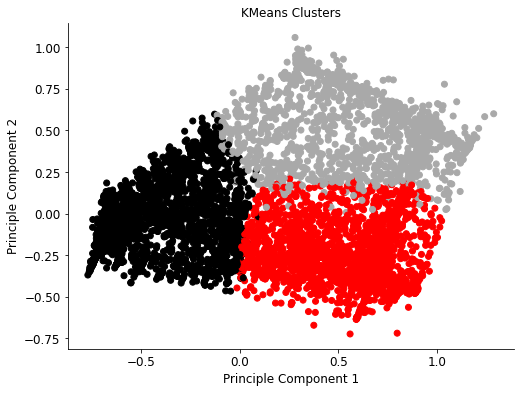

In [281]:
#plotting the clusters - there are three distinct clusters
#set the colours
kmeans_colours = ['red' if cluster == 0 else 'black' if cluster == 1 else 'darkgrey' for cluster in credit_data['Cluster']]

fig = plt.figure(figsize = (8, 6))
ax = plt.subplot()

plt.scatter(x = 'x', y = 'y', data = credit_data_scaled, color = kmeans_colours)

#removing top and right chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#applying the above function so that axis values are separated by a comma - for the y axis only
#ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))
    
plt.xlabel('Principle Component 1', fontsize = 12)
plt.ylabel('Principle Component 2', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.grid(False)
plt.title('KMeans Clusters', fontsize = 12)
plt.savefig('kmeans_clusters')

In [282]:
#checking average balance for different clusters - cluster 0 has the lowest balance, cluster 2 has the highest. Cluster 2
#has the highest credit limit and cluster 0 has the lowest
balance = credit_data.groupby('Cluster')[['BALANCE', 'CREDIT_LIMIT']].mean().reset_index()
balance

,Cluster,BALANCE,CREDIT_LIMIT
0,0,1137.913083,3944.708221
1,1,1706.703362,4143.629949
2,2,1921.532155,6702.146410


In [283]:
#cluster 0 has a large volume of purchases but makes smaller one-off purchases. Majority of purchases are repaid by installments
#cluster 1 has a low volume of purchases and makes use of the cash advance
#cluster 2 has the highest volume of purchases and makes a high volume of one-off purchases
purchases = credit_data.groupby('Cluster')[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']]\
.mean().reset_index()
purchases

,Cluster,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE
0,0,1066.404585,268.618081,798.430873,502.922921
1,1,296.265536,233.885811,62.568834,1358.166774
2,2,3195.648586,2390.764920,804.883666,655.081102


In [284]:
#cluster 2 makes purchases most frequently followed by cluster 0. Cluster 0 most frequently pays via installments
purchase_frequency = credit_data.groupby('Cluster')[['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', \
                                                     'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']]\
                                                    .mean().reset_index()
purchase_frequency

,Cluster,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY
0,0,0.870801,0.098002,0.820040,0.070553
1,1,0.142894,0.081442,0.060286,0.185781
2,2,0.893257,0.798344,0.482183,0.092495


In [285]:
#cluster 2 makes the highest number of transactions, cluster 1 makes the lowest number of transactions. Cash advance numbers
#are similar across all clusters
number_transactions = credit_data.groupby('Cluster')[['CASH_ADVANCE_TRX', 'PURCHASES_TRX']].mean().reset_index()
number_transactions

,Cluster,CASH_ADVANCE_TRX,PURCHASES_TRX
0,0,1.730147,20.805246
1,1,4.429932,2.682684
2,2,2.311157,42.327789


In [286]:
#cluster 0 makes the lowest overall payments but the highest mimimum payments - maybe because they pay by installments and 
#so interest piles up. Cluster 2 makes the highest overall payments and lowest minimum payments
payments = credit_data.groupby('Cluster')[['PAYMENTS', 'MINIMUM_PAYMENTS']].mean().reset_index()
payments

,Cluster,PAYMENTS,MINIMUM_PAYMENTS
0,0,1392.192055,916.800571
1,1,1477.632301,825.594206
2,2,3227.187963,769.474373


In [287]:
#Cluster 1 has the lowest proportion of their balance paid at just 7%. Cluster 2 has the highest percentage paid at 27%
perc_payment = credit_data.groupby('Cluster').PRC_FULL_PAYMENT.mean().reset_index()
perc_payment

,Cluster,PRC_FULL_PAYMENT
0,0,0.238250
1,1,0.067826
2,2,0.270735


In [288]:
#no real difference in tenure between the clusters
tenure = credit_data.groupby('Cluster').TENURE.mean().reset_index()
tenure

,Cluster,TENURE
0,0,11.516709
1,1,11.446867
2,2,11.749134


In [289]:
#tidying up titles for charts
credit_data = credit_data.rename(columns = {'BALANCE': 'Balance', 'BALANCE_FREQUENCY': 'Balance frequency', 'PURCHASES': \
                                           'Purchases', 'ONEOFF_PURCHASES': 'One-off purchases', 'INSTALLMENTS_PURCHASES':\
                                           'Installment purchases', 'CASH_ADVANCE': 'Cash advance', 'PURCHASES_FREQUENCY': \
                                           'Purchase frequency', 'ONEOFF_PURCHASES_FREQUENCY': 'One-off purchase frequency',\
                                           'PURCHASES_INSTALLMENTS_FREQUENCY': 'Purchase installment frequency',\
                                           'CASH_ADVANCE_FREQUENCY': 'Cash advance frequency', 'CASH_ADVANCE_TRX': \
                                           'Cash advance transactions', 'PURCHASES_TRX': 'Purchase transactions', 'CREDIT_LIMIT':\
                                           'Credit limit', 'PAYMENTS': 'Payments', 'MINIMUM_PAYMENTS': 'Minimum payments', \
                                           'PRC_FULL_PAYMENT': 'Percentage of full payment', 'TENURE': 'Tenure'})

In [290]:
#multiplying percentage of full payment column by 100 for chart
credit_data['Percentage of full payment'] = credit_data['Percentage of full payment'] * 100

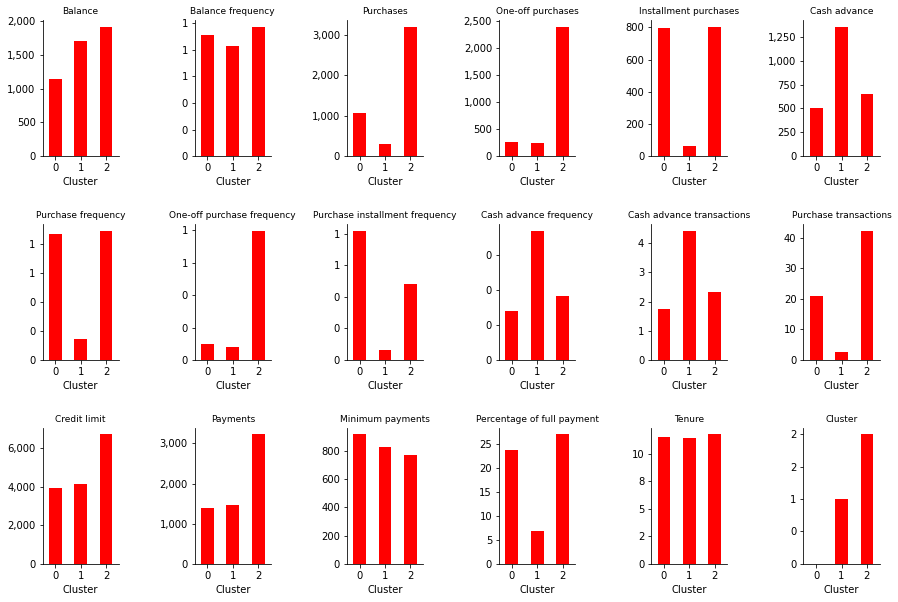

In [292]:
#creating bar charts to show differences in clusters

#creating an empty dictionary which will store the individual dataframes
credit_dict = {}

#creating figures for charts
fig = plt.figure(figsize = (15, 10))

#function adds comma separator labels - it takes tick label and tick position
def comma(x, pos):
    return format(x, ",.0f")

#looping through pet_category dataframe to create the categorical charts
for i, feature, in enumerate(credit_data, start = 1):
    title = titles
    credit_dict[feature] = credit_data.groupby('Cluster')[feature].mean()
    ax = plt.subplot(3, 6, i)
    credit_dict[feature].plot(x= 'Cluster', y = [feature], kind = 'bar', color = 'red')
    #removing top and left axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #applying the above function to y axis
    ax.yaxis.set_major_formatter(tcr.FuncFormatter(comma))
    ax.set_title(feature, fontsize = 9)
    #tick label were showing sideways so rotating them upwards
    plt.xticks(rotation = 360)
    #adjusting space between subplots
    plt.subplots_adjust(wspace = 1.0, hspace = 0.5)
    
plt.savefig('final_charts')

In [293]:
#can now merge customer id column back so company and use clustering information for targeting
credit_data = credit_data.merge(cust_id, left_index = True, right_index = True)
credit_data.head()

,Balance,Balance frequency,Purchases,One-off purchases,Installment purchases,Cash advance,Purchase frequency,One-off purchase frequency,Purchase installment frequency,Cash advance frequency,Cash advance transactions,Purchase transactions,Credit limit,Payments,Minimum payments,Percentage of full payment,Tenure,Cluster,CUST_ID
0,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.51,0.0,12,1,C10001
1,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.34,22.0,12,1,C10002
2,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,627.28,0.0,12,2,C10003
3,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,312.34,0.0,12,1,C10004
4,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.79,0.0,12,1,C10005
